In [162]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import FancyArrow

## Floor Area

In [163]:
# Import assumption to estimate FA
FA_variable = pd.read_csv('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/All-in-One/Input/Input variables.csv', skiprows=1)
# Assign values to variables
SF_LF_2018 = FA_variable['SF_LF_2018'][0]
MF_LF_2018 = FA_variable['MF_LF_2018'][0]
SF_LF_2020 = FA_variable['SF_LF_2020'][0]
MF_LF_2020 = FA_variable['MF_LF_2020'][0]
SF_LF_2040 = FA_variable['SF_LF_2040'][0]
MF_LF_2040 = FA_variable['MF_LF_2040'][0]
MR_MF_LF = FA_variable['MR_MF_LF'][0]
HR_MF_RC = FA_variable['HR_MF_RC'][0]
BAU_MT = FA_variable['BAU_MT'][0]
SC_MT_new_RCSF_to_MT = FA_variable['SC_MT_new_RCSF_to_MT'][0]
SC_MT_new_RCMF_to_MT = FA_variable['SC_MT_new_RCMF_to_MT'][0]
SC_AC_new_RCSF_to_AC = FA_variable['SC_AC_new_RCSF_to_AC'][0]
SC_AC_new_RCMF_to_AC = FA_variable['SC_AC_new_RCMF_to_AC'][0]

In [164]:
# Import FA data in 2018
FA_data_2018 = pd.read_csv('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/All-in-One/Input/Input Floor Area 2018.csv', skiprows=1)

FA_data_2018['Total_FA_SF'] = FA_data_2018['N_SF'] * FA_data_2018['Avg_FA_SF']
FA_data_2018['Total_FA_MF'] = FA_data_2018['N_MF'] * FA_data_2018['Avg_FA_MF']
FA_data_2018['Total_FA_MRMF'] = FA_data_2018['Total_FA_MF'] * MF_LF_2018
FA_data_2018['Total_FA_HRMF'] = FA_data_2018['Total_FA_MF'] * (1-MF_LF_2018)
FA_data_2018['Conv_Total_FA_LFSF'] = FA_data_2018['Total_FA_SF'] * SF_LF_2018
FA_data_2018['Conv_Total_FA_RCSF'] = FA_data_2018['Total_FA_SF'] * (1-SF_LF_2018)
FA_data_2018['Conv_Total_FA_SF'] = FA_data_2018['Conv_Total_FA_LFSF'] + FA_data_2018['Conv_Total_FA_RCSF']
FA_data_2018['Conv_Total_FA_MF'] = FA_data_2018['Total_FA_MF']
FA_data_2018['Conv_Total_FA_MRMF'] = FA_data_2018['Conv_Total_FA_MF'] * MF_LF_2018
FA_data_2018['Conv_Total_FA_HRMF'] = FA_data_2018['Conv_Total_FA_MF'] * (1-MF_LF_2018)


In [165]:
# Import FA data in 2020
FA_data_2020 = pd.read_csv('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/All-in-One/Input/Input Floor Area 2020.csv', skiprows=1)

FA_data_2020['Total_FA_SF'] = FA_data_2020['N_SF'] * FA_data_2020['Avg_FA_SF']
FA_data_2020['Total_FA_MF'] = FA_data_2020['N_MF'] * FA_data_2020['Avg_FA_MF']
FA_data_2020['Total_FA_MRMF'] = FA_data_2020['Total_FA_MF'] * MF_LF_2018
FA_data_2020['Total_FA_HRMF'] = FA_data_2020['Total_FA_MF'] * (1-MF_LF_2018)
FA_data_2020['Conv_Total_FA_LFSF'] = FA_data_2018['Total_FA_SF'] * SF_LF_2018
FA_data_2020['Conv_Total_FA_RCSF'] = FA_data_2018['Total_FA_SF'] * (1-SF_LF_2018)
FA_data_2020['Conv_Total_FA_SF'] = FA_data_2020['Conv_Total_FA_LFSF'] + FA_data_2020['Conv_Total_FA_RCSF']
FA_data_2020['Conv_Total_FA_MF'] = FA_data_2018['Total_FA_MF']
FA_data_2020['Conv_Total_FA_MRMF'] = FA_data_2020['Conv_Total_FA_MF'] * MF_LF_2018
FA_data_2020['Conv_Total_FA_HRMF'] = FA_data_2020['Conv_Total_FA_MF'] * (1-MF_LF_2018)
FA_data_2020['Avg_FA_New_MF'] = ((FA_data_2020['N_MF'] * FA_data_2020['Avg_FA_MF']) - (FA_data_2018['N_MF'] * FA_data_2018['Avg_FA_MF'])) / (FA_data_2020['N_MF'] - FA_data_2018['N_MF'])
FA_data_2020['Total_FA_New_SF'] = (FA_data_2020['N_SF'] - FA_data_2018['N_SF']) * FA_data_2020['Avg_FA_New_SF']
FA_data_2020['Total_FA_New_SF_LF'] = FA_data_2020['Total_FA_New_SF'] * SF_LF_2020
FA_data_2020['Total_FA_New_SF_RC'] = FA_data_2020['Total_FA_New_SF'] * (1-SF_LF_2020)
FA_data_2020['Total_FA_New_MF'] = (FA_data_2020['N_MF'] - FA_data_2018['N_MF']) * FA_data_2020['Avg_FA_New_MF']
FA_data_2020['Total_FA_New_MF_LF'] = FA_data_2020['Total_FA_New_MF'] * MF_LF_2020
FA_data_2020['Total_FA_New_MF_RC'] = FA_data_2020['Total_FA_New_MF'] * (1-MF_LF_2020)
FA_data_2020['Conv_Total_FA_New_LFSF'] = FA_data_2020['Total_FA_New_SF'] * SF_LF_2018
FA_data_2020['Conv_Total_FA_New_RCSF'] = FA_data_2020['Total_FA_New_SF'] * (1-SF_LF_2018)
FA_data_2020['Conv_Total_FA_New_SF'] =FA_data_2020['Conv_Total_FA_New_LFSF'] + FA_data_2020['Conv_Total_FA_New_RCSF']
FA_data_2020['Conv_Total_FA_New_LFSF'] =FA_data_2020['Total_FA_New_SF_LF']
FA_data_2020['Conv_Total_FA_New_RCSF'] =FA_data_2020['Total_FA_New_SF_RC']
FA_data_2020['Conv_Total_FA_New_MF'] = FA_data_2020['Total_FA_New_MF']
FA_data_2020['Conv_Total_FA_New_LFMF'] = FA_data_2020['Total_FA_New_MF_LF']
FA_data_2020['Conv_Total_FA_New_RCMF'] = FA_data_2020['Total_FA_New_MF_RC']
FA_data_2020['Total_FA_extended_SF'] = FA_data_2020['Total_FA_SF'] - FA_data_2020['Conv_Total_FA_SF'] - FA_data_2020['Conv_Total_FA_New_SF']
FA_data_2020['Total_FA_extended_LFSF'] = FA_data_2020['Total_FA_extended_SF'] * SF_LF_2018
FA_data_2020['Total_FA_extended_RCSF'] = FA_data_2020['Total_FA_extended_SF'] * (1-SF_LF_2018)
FA_data_2020['FA_new_LF'] = FA_data_2020['Conv_Total_FA_New_LFSF'] + FA_data_2020['Total_FA_New_MF_LF'] + FA_data_2020['Total_FA_extended_LFSF']
FA_data_2020['FA_new_RC'] = FA_data_2020['Conv_Total_FA_New_RCSF'] + FA_data_2020['Total_FA_New_MF_RC'] + FA_data_2020['Total_FA_extended_RCSF']
FA_data_2020['FA_new_MT'] = FA_data_2020['MT_Total_FA_SF&MF']
FA_data_2020['FA_new_AC'] = FA_data_2020['AC_Total_FA_SF&MF']

In [166]:
# Merge data in 2018 & 2020
merged_df = pd.concat([FA_data_2018, FA_data_2020])


In [167]:
# Import FA data in 2040
FA_data_2040 = pd.read_csv('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/All-in-One/Input/Input Floor Area 2040.csv', skiprows=1)

FA_data_2040['Total_FA_SF'] = FA_data_2040['N_SF'] * FA_data_2040['Avg_FA_SF']
FA_data_2040['Total_FA_MF'] = FA_data_2040['N_MF'] * FA_data_2040['Avg_FA_MF']
FA_data_2040['Total_FA_MRMF'] = FA_data_2040['Total_FA_MF'] * MF_LF_2018
FA_data_2040['Total_FA_HRMF'] = FA_data_2040['Total_FA_MF'] * (1-MF_LF_2018)
FA_data_2040['Conv_Total_FA_LFSF'] = FA_data_2018['Total_FA_SF'] * SF_LF_2018
FA_data_2040['Conv_Total_FA_RCSF'] = FA_data_2018['Total_FA_SF'] * (1-SF_LF_2018)
FA_data_2040['Conv_Total_FA_SF'] = FA_data_2040['Conv_Total_FA_LFSF'] + FA_data_2040['Conv_Total_FA_RCSF']
FA_data_2040['Conv_Total_FA_MF'] = FA_data_2018['Total_FA_MF']
FA_data_2040['Conv_Total_FA_MRMF'] = FA_data_2040['Conv_Total_FA_MF'] * MF_LF_2018
FA_data_2040['Conv_Total_FA_HRMF'] = FA_data_2040['Conv_Total_FA_MF'] * (1-MF_LF_2018)
FA_data_2040['Avg_FA_New_MF'] = ((FA_data_2040['N_MF'] * FA_data_2040['Avg_FA_MF']) - (FA_data_2018['N_MF'] * FA_data_2018['Avg_FA_MF'])) / (FA_data_2040['N_MF'] - FA_data_2018['N_MF'])
FA_data_2040['Total_FA_New_SF'] = (FA_data_2040['N_SF'] - FA_data_2018['N_SF']) * FA_data_2040['Avg_FA_New_SF']
FA_data_2040['Total_FA_New_SF_LF'] = FA_data_2040['Total_FA_New_SF'] * SF_LF_2040
FA_data_2040['Total_FA_New_SF_RC'] = FA_data_2040['Total_FA_New_SF'] * (1-SF_LF_2040)
FA_data_2040['Total_FA_New_MF'] = (FA_data_2040['N_MF'] - FA_data_2018['N_MF']) * FA_data_2040['Avg_FA_New_MF']
FA_data_2040['Total_FA_New_MF_LF'] = FA_data_2040['Total_FA_New_MF'] * MF_LF_2040
FA_data_2040['Total_FA_New_MF_RC'] = FA_data_2040['Total_FA_New_MF'] * (1-MF_LF_2040)
FA_data_2040['Conv_Total_FA_New_LFSF'] = FA_data_2040['Total_FA_New_SF'] * SF_LF_2018
FA_data_2040['Conv_Total_FA_New_RCSF'] = FA_data_2040['Total_FA_New_SF'] * (1-SF_LF_2018)
FA_data_2040['Conv_Total_FA_New_SF'] =FA_data_2040['Conv_Total_FA_New_LFSF'] + FA_data_2040['Conv_Total_FA_New_RCSF']
FA_data_2040['Conv_Total_FA_New_LFSF'] =FA_data_2040['Total_FA_New_SF_LF']
FA_data_2040['Conv_Total_FA_New_RCSF'] =FA_data_2040['Total_FA_New_SF_RC']
FA_data_2040['Conv_Total_FA_New_MF'] = FA_data_2040['Total_FA_New_MF']
FA_data_2040['Conv_Total_FA_New_LFMF'] = FA_data_2040['Total_FA_New_MF_LF']
FA_data_2040['Conv_Total_FA_New_RCMF'] = FA_data_2040['Total_FA_New_MF_RC']
FA_data_2040['Total_FA_extended_SF'] = FA_data_2040['Total_FA_SF'] - FA_data_2040['Conv_Total_FA_SF'] - FA_data_2040['Conv_Total_FA_New_SF']
FA_data_2040['Total_FA_extended_LFSF'] = FA_data_2040['Total_FA_extended_SF'] * SF_LF_2018
FA_data_2040['Total_FA_extended_RCSF'] = FA_data_2040['Total_FA_extended_SF'] * (1-SF_LF_2018)
FA_data_2040['FA_new_LF'] = FA_data_2040['Conv_Total_FA_New_LFSF'] + FA_data_2040['Total_FA_New_MF_LF'] + FA_data_2040['Total_FA_extended_LFSF']
FA_data_2040['FA_new_RC'] = FA_data_2040['Conv_Total_FA_New_RCSF'] + FA_data_2040['Total_FA_New_MF_RC'] + FA_data_2040['Total_FA_extended_RCSF']
FA_data_2040['FA_new_MT'] = FA_data_2040['MT_Total_FA_SF&MF']
FA_data_2040['FA_new_AC'] = FA_data_2040['AC_Total_FA_SF&MF']

In [168]:
# Merge FA data in 2018, 2020, & 2040
merged_df = pd.concat([merged_df, FA_data_2040])


In [169]:
# Mass-Timber
Mass_Timber = FA_data_2040.copy()
Mass_Timber['Scenario'] = 'Mass-Timber'
Mass_Timber['N_HH'] = np.nan
Mass_Timber['Conv_Total_FA_New_LFSF'] = Mass_Timber['Total_FA_New_SF_LF'] * SC_MT_new_RCSF_to_MT
Mass_Timber['Conv_Total_FA_New_RCSF'] = Mass_Timber['Total_FA_New_SF_RC'] * (1-SC_MT_new_RCSF_to_MT)
Mass_Timber['Conv_Total_FA_New_SF'] = Mass_Timber['Conv_Total_FA_New_LFSF'] + Mass_Timber['Conv_Total_FA_New_RCSF']
Mass_Timber['Conv_Total_FA_New_LFMF'] = Mass_Timber['Total_FA_New_MF_LF'] * SC_MT_new_RCMF_to_MT
Mass_Timber['Conv_Total_FA_New_RCMF'] = Mass_Timber['Total_FA_New_MF_RC'] * (1-SC_MT_new_RCMF_to_MT)
Mass_Timber['Conv_Total_FA_New_MF'] = Mass_Timber['Conv_Total_FA_New_LFMF'] + Mass_Timber['Conv_Total_FA_New_RCMF']
Mass_Timber['Total_FA_extended_RCSF'] = (Mass_Timber['Total_FA_extended_SF']*(1-SF_LF_2018))*(1-SC_MT_new_RCSF_to_MT)
Mass_Timber['Total_FA_extended_RC_MTorAC'] = (Mass_Timber['Total_FA_extended_SF']*(1-SF_LF_2018))*SC_MT_new_RCSF_to_MT
Mass_Timber['MT_Total_FA_RCSF'] = Mass_Timber['Total_FA_New_SF_RC'] * SC_MT_new_RCSF_to_MT
Mass_Timber['MT_Total_FA_RCMF'] = Mass_Timber['Total_FA_New_MF_RC'] * SC_MT_new_RCMF_to_MT
Mass_Timber['MT_extended'] = Mass_Timber['Total_FA_extended_RC_MTorAC']
Mass_Timber['MT_Total_FA_SF&MF'] = Mass_Timber['MT_Total_FA_RCSF'] + Mass_Timber['MT_Total_FA_RCMF'] + Mass_Timber['MT_extended']
Mass_Timber['FA_new_LF'] = Mass_Timber['Conv_Total_FA_New_LFSF'] + Mass_Timber['Total_FA_New_MF_LF'] + Mass_Timber['Total_FA_extended_LFSF']
Mass_Timber['FA_new_RC'] = Mass_Timber['Conv_Total_FA_New_RCSF'] + Mass_Timber['Conv_Total_FA_New_RCMF'] + Mass_Timber['Total_FA_extended_RCSF']
Mass_Timber['FA_new_MT'] = Mass_Timber['MT_Total_FA_SF&MF']
Mass_Timber['FA_new_AC'] = Mass_Timber['AC_Total_FA_SF&MF']

merged_df = merged_df.append(Mass_Timber, ignore_index=True)

/var/folders/45/0prgpk010y5d3wglp3r_dz7r0000gn/T/ipykernel_84780/677608008.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(Mass_Timber, ignore_index=True)


In [170]:
# Alternative Cement
Alternative_Cement = Mass_Timber.copy()

Alternative_Cement['Scenario'] = 'Alternative Cement'
Alternative_Cement['N_HH'] = np.nan
Alternative_Cement['MT_Total_FA_SF&MF'] = np.nan
Alternative_Cement['MT_Total_FA_RCSF'] = np.nan
Alternative_Cement['MT_Total_FA_RCMF'] = np.nan
Alternative_Cement['MT_extended'] = np.nan
Alternative_Cement['AC_Total_FA_RCSF'] = Alternative_Cement['Total_FA_New_SF_RC'] * SC_AC_new_RCSF_to_AC
Alternative_Cement['AC_Total_FA_RCMF'] = Alternative_Cement['Total_FA_New_MF_RC'] * SC_AC_new_RCMF_to_AC
Alternative_Cement['AC_extended'] = Alternative_Cement['Total_FA_extended_RC_MTorAC']
Alternative_Cement['AC_Total_FA_SF&MF'] = Alternative_Cement['AC_Total_FA_RCSF'] + Alternative_Cement['AC_Total_FA_RCMF'] + Alternative_Cement['AC_extended']
Alternative_Cement['FA_new_LF'] = Alternative_Cement['Conv_Total_FA_New_LFSF'] + Alternative_Cement['Total_FA_New_MF_LF'] + Alternative_Cement['Total_FA_extended_LFSF']
Alternative_Cement['FA_new_RC'] = Alternative_Cement['Conv_Total_FA_New_RCSF'] + Alternative_Cement['Conv_Total_FA_New_RCMF'] + Alternative_Cement['Total_FA_extended_RCSF']
Alternative_Cement['FA_new_MT'] = Alternative_Cement['MT_Total_FA_SF&MF']
Alternative_Cement['FA_new_AC'] = Alternative_Cement['AC_Total_FA_SF&MF']

merged_df = merged_df.append(Alternative_Cement, ignore_index=True)

/var/folders/45/0prgpk010y5d3wglp3r_dz7r0000gn/T/ipykernel_84780/1162551045.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(Alternative_Cement, ignore_index=True)


In [171]:
FA_data = merged_df
FA_data.to_csv('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/All-in-One/Output/CSV/Floor Area.csv', index=True)


## Emission

In [172]:
FA_data = FA_data.set_index(FA_data.iloc[:, 0])
# FA_data

In [173]:
# Emission Factor
EF_data = pd.read_csv('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/All-in-One/Input/Emission Factor.csv')

EF_NetEmission_LF = EF_data['LF'][0]
EF_NetEmission_RC = EF_data['RC'][0]
EF_NetEmission_MT = EF_data['MT'][0]
EF_NetEmission_CSA_Low = EF_data['CSA (Low-end)'][0]
EF_NetEmission_CSA_High = EF_data['CSA (High-end)'][0]
EF_NetEmission_AAC_Low = EF_data['AAC (Low-end)'][0]
EF_NetEmission_AAC_High = EF_data['AAC (High-end)'][0]

EF_ProcessEmission_LF = EF_data['LF'][1]
EF_ProcessEmission_RC = EF_data['RC'][1]
EF_ProcessEmission_MT = EF_data['MT'][1]
EF_ProcessEmission_CSA_Low = EF_data['CSA (Low-end)'][1]
EF_ProcessEmission_CSA_High = EF_data['CSA (High-end)'][1]
EF_ProcessEmission_AAC_Low = EF_data['AAC (Low-end)'][1]
EF_ProcessEmission_AAC_High = EF_data['AAC (High-end)'][1]

EF_Residue_LF = EF_data['LF'][2]
EF_Residue_RC = EF_data['RC'][2]
EF_Residue_MT = EF_data['MT'][2]
EF_Residue_CSA_Low = EF_data['CSA (Low-end)'][2]
EF_Residue_CSA_High = EF_data['CSA (High-end)'][2]
EF_Residue_AAC_Low = EF_data['AAC (Low-end)'][2]
EF_Residue_AAC_High = EF_data['AAC (High-end)'][2]

EF_CarbonStorage_LF = EF_data['LF'][3]
EF_CarbonStorage_RC = EF_data['RC'][3]
EF_CarbonStorage_MT = EF_data['MT'][3]
EF_CarbonStorage_CSA_Low = EF_data['CSA (Low-end)'][3]
EF_CarbonStorage_CSA_High = EF_data['CSA (High-end)'][3]
EF_CarbonStorage_AAC_Low = EF_data['AAC (Low-end)'][3]
EF_CarbonStorage_AAC_High = EF_data['AAC (High-end)'][3]

### Estimate Emission RC Only

In [174]:
# Prepare the dataframe
column = {'BAU2020_NetEmission': [], 'BAU2020_ProcessEmission': [], 'BAU2020_Residue': [], 'BAU2020_CarbonStorage': [],
'BAU2040_NetEmission': [], 'BAU2040_ProcessEmission': [], 'BAU2040_Residue': [], 'BAU2040_CarbonStorage': [],
'BAU2040_NetEmission': [], 'BAU2040_ProcessEmission': [], 'BAU2040_Residue': [], 'BAU2040_CarbonStorage': [],
'Mass_Timber_NetEmission': [], 'Mass_Timber_ProcessEmission': [], 'Mass_Timber_Residue': [], 'Mass_Timber_CarbonStorage': [],
'Alternative_Cement_NetEmission': [], 'Alternative_Cement_ProcessEmission': [], 'Alternative_Cement_Residue': [], 'Alternative_Cement_CarbonStorage': []}
index = ['Emission from RC', 'Emission from MT', 'Emission from CSA (Low-end)', 
         'Emission from CSA (High-end)','Emission from AAC (Low-end)', 'Emission from AAC (High-end)', 
         'Total Emission with RC', 'Total Emission with MT', 'Total Emission with CSA (Low-end)', 'Total Emission with CSA (High-end)',
         'Total Emission with AAC (Low-end)', 'Total Emission with AAC (High-end)']

RC_only_Emission_data = pd.DataFrame(index=index, columns=column.keys())
RC_only_Emission_data = RC_only_Emission_data.fillna(0)

In [175]:
# Calculate net emission balance
list1 = ['BAU2020_NetEmission', 'BAU2040_NetEmission', 'Mass_Timber_NetEmission', 'Alternative_Cement_NetEmission']
list2 = ['BAU 2020', 'BAU 2040','Mass-Timber', 'Alternative Cement']

for scenario, sub_scenario in zip(list1, list2):
    RC_only_Emission_data.loc['Emission from RC', scenario] = FA_data.loc[sub_scenario, 'FA_new_RC'] * EF_NetEmission_RC
    RC_only_Emission_data.loc['Emission from RC', scenario] = FA_data.loc[sub_scenario, 'FA_new_RC'] * EF_NetEmission_RC
    RC_only_Emission_data.loc['Emission from MT', scenario] = FA_data.loc[sub_scenario, 'FA_new_MT'] * EF_NetEmission_MT
    RC_only_Emission_data.loc['Emission from CSA (Low-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_NetEmission_CSA_Low
    RC_only_Emission_data.loc['Emission from CSA (High-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_NetEmission_CSA_High
    RC_only_Emission_data.loc['Emission from AAC (Low-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_NetEmission_AAC_Low
    RC_only_Emission_data.loc['Emission from AAC (High-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_NetEmission_AAC_High

# Calculate process emission
list1 = ['BAU2020_ProcessEmission', 'BAU2040_ProcessEmission', 'Mass_Timber_ProcessEmission', 'Alternative_Cement_ProcessEmission']
list2 = ['BAU 2020', 'BAU 2040','Mass-Timber', 'Alternative Cement']


for scenario, sub_scenario in zip(list1, list2):
    RC_only_Emission_data.loc['Emission from RC', scenario] = FA_data.loc[sub_scenario, 'FA_new_RC'] * EF_ProcessEmission_RC
    RC_only_Emission_data.loc['Emission from RC', scenario] = FA_data.loc[sub_scenario, 'FA_new_RC'] * EF_ProcessEmission_RC
    RC_only_Emission_data.loc['Emission from MT', scenario] = FA_data.loc[sub_scenario, 'FA_new_MT'] * EF_ProcessEmission_MT
    RC_only_Emission_data.loc['Emission from CSA (Low-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_ProcessEmission_CSA_Low
    RC_only_Emission_data.loc['Emission from CSA (High-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_ProcessEmission_CSA_High
    RC_only_Emission_data.loc['Emission from AAC (Low-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_ProcessEmission_AAC_Low
    RC_only_Emission_data.loc['Emission from AAC (High-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_ProcessEmission_AAC_High

# Calculate biomass residue
list1 = ['BAU2020_Residue', 'BAU2040_Residue', 'Mass_Timber_Residue', 'Alternative_Cement_Residue']
list2 = ['BAU 2020', 'BAU 2040','Mass-Timber', 'Alternative Cement']


for scenario, sub_scenario in zip(list1, list2):
    RC_only_Emission_data.loc['Emission from RC', scenario] = FA_data.loc[sub_scenario, 'FA_new_RC'] * EF_Residue_RC
    RC_only_Emission_data.loc['Emission from RC', scenario] = FA_data.loc[sub_scenario, 'FA_new_RC'] * EF_Residue_RC
    RC_only_Emission_data.loc['Emission from MT', scenario] = FA_data.loc[sub_scenario, 'FA_new_MT'] * EF_Residue_MT
    RC_only_Emission_data.loc['Emission from CSA (Low-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_Residue_CSA_Low
    RC_only_Emission_data.loc['Emission from CSA (High-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_Residue_CSA_High
    RC_only_Emission_data.loc['Emission from AAC (Low-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_Residue_AAC_Low
    RC_only_Emission_data.loc['Emission from AAC (High-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_Residue_AAC_High

# Calculate Carbon stored
list1 = ['BAU2020_CarbonStorage', 'BAU2040_CarbonStorage', 'Mass_Timber_CarbonStorage', 'Alternative_Cement_CarbonStorage']
list2 = ['BAU 2020', 'BAU 2040','Mass-Timber', 'Alternative Cement']


for scenario, sub_scenario in zip(list1, list2):
    RC_only_Emission_data.loc['Emission from RC', scenario] = FA_data.loc[sub_scenario, 'FA_new_RC'] * EF_CarbonStorage_RC
    RC_only_Emission_data.loc['Emission from RC', scenario] = FA_data.loc[sub_scenario, 'FA_new_RC'] * EF_CarbonStorage_RC
    RC_only_Emission_data.loc['Emission from MT', scenario] = FA_data.loc[sub_scenario, 'FA_new_MT'] * EF_CarbonStorage_MT
    RC_only_Emission_data.loc['Emission from CSA (Low-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_CarbonStorage_CSA_Low
    RC_only_Emission_data.loc['Emission from CSA (High-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_CarbonStorage_CSA_High
    RC_only_Emission_data.loc['Emission from AAC (Low-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_CarbonStorage_AAC_Low
    RC_only_Emission_data.loc['Emission from AAC (High-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_CarbonStorage_AAC_High

# Calculate total emission
RC_only_Emission_data.loc['Total Emission with RC'] = RC_only_Emission_data.loc['Emission from RC'].values
RC_only_Emission_data.loc['Total Emission with MT'] = RC_only_Emission_data.loc['Emission from MT'].values
RC_only_Emission_data.loc['Total Emission with CSA (Low-end)'] = RC_only_Emission_data.loc['Emission from CSA (Low-end)'].values
RC_only_Emission_data.loc['Total Emission with CSA (High-end)'] = RC_only_Emission_data.loc['Emission from CSA (High-end)'].values
RC_only_Emission_data.loc['Total Emission with AAC (Low-end)'] = RC_only_Emission_data.loc['Emission from AAC (Low-end)'].values
RC_only_Emission_data.loc['Total Emission with AAC (High-end)'] = RC_only_Emission_data.loc['Emission from AAC (High-end)'].values

# Calculate annual emission
RC_only_Emission_data_annual = RC_only_Emission_data.copy()
RC_only_Emission_data_annual[RC_only_Emission_data_annual.columns[0:3]] = RC_only_Emission_data_annual[RC_only_Emission_data_annual.columns[0:3]] / 2
RC_only_Emission_data_annual[RC_only_Emission_data_annual.columns[3:]] = RC_only_Emission_data_annual[RC_only_Emission_data_annual.columns[3:]] / 22
RC_only_Emission_data_annual.index.name = 'Strategy'

In [176]:
RC_only_Emission_data_annual.to_csv('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/All-in-One/Output/CSV/RC_Only_Emission_Annual.csv', index=True)

### Estimate Emission City-Wide

In [177]:
# Prepare the dataframe
column = {'BAU2020_NetEmission': [], 'BAU2020_ProcessEmission': [], 'BAU2020_Residue': [], 'BAU2020_CarbonStorage': [],
'BAU2040_NetEmission': [], 'BAU2040_ProcessEmission': [], 'BAU2040_Residue': [], 'BAU2040_CarbonStorage': [],
'BAU2040_NetEmission': [], 'BAU2040_ProcessEmission': [], 'BAU2040_Residue': [], 'BAU2040_CarbonStorage': [],
'Mass_Timber_NetEmission': [], 'Mass_Timber_ProcessEmission': [], 'Mass_Timber_Residue': [], 'Mass_Timber_CarbonStorage': [],
'Alternative_Cement_NetEmission': [], 'Alternative_Cement_ProcessEmission': [], 'Alternative_Cement_Residue': [], 'Alternative_Cement_CarbonStorage': []}
index = ['Emission from LF', 'Emission from RC', 'Emission from MT', 'Emission from CSA (Low-end)', 
         'Emission from CSA (High-end)','Emission from AAC (Low-end)', 'Emission from AAC (High-end)', 
         'Total Emission with LF&RC&MT', 'Total Emission with CSA (Low-end)', 'Total Emission with CSA (High-end)',
         'Total Emission with AAC (Low-end)', 'Total Emission with AAC (High-end)']

City_Wide_Emission_data = pd.DataFrame(index=index, columns=column.keys())
City_Wide_Emission_data = City_Wide_Emission_data.fillna(0)

In [178]:
# Calculate net emission balance
list1 = ['BAU2020_NetEmission', 'BAU2040_NetEmission', 'Mass_Timber_NetEmission', 'Alternative_Cement_NetEmission']
list2 = ['BAU 2020', 'BAU 2040','Mass-Timber', 'Alternative Cement']

for scenario, sub_scenario in zip(list1, list2):
    City_Wide_Emission_data.loc['Emission from RC', scenario] = FA_data.loc[sub_scenario, 'FA_new_RC'] * EF_NetEmission_RC
    City_Wide_Emission_data.loc['Emission from RC', scenario] = FA_data.loc[sub_scenario, 'FA_new_RC'] * EF_NetEmission_RC
    City_Wide_Emission_data.loc['Emission from MT', scenario] = FA_data.loc[sub_scenario, 'FA_new_MT'] * EF_NetEmission_MT
    City_Wide_Emission_data.loc['Emission from CSA (Low-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_NetEmission_CSA_Low
    City_Wide_Emission_data.loc['Emission from CSA (High-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_NetEmission_CSA_High
    City_Wide_Emission_data.loc['Emission from AAC (Low-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_NetEmission_AAC_Low
    City_Wide_Emission_data.loc['Emission from AAC (High-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_NetEmission_AAC_High

for scenario, sub_scenario in zip(list1, list2):
    City_Wide_Emission_data.loc['Emission from LF', scenario] = FA_data.loc[sub_scenario, 'FA_new_LF'] * EF_NetEmission_LF

# Calculate process emission
list1 = ['BAU2020_ProcessEmission', 'BAU2040_ProcessEmission', 'Mass_Timber_ProcessEmission', 'Alternative_Cement_ProcessEmission']
list2 = ['BAU 2020', 'BAU 2040','Mass-Timber', 'Alternative Cement']

for scenario, sub_scenario in zip(list1, list2):
    City_Wide_Emission_data.loc['Emission from RC', scenario] = FA_data.loc[sub_scenario, 'FA_new_RC'] * EF_ProcessEmission_RC
    City_Wide_Emission_data.loc['Emission from RC', scenario] = FA_data.loc[sub_scenario, 'FA_new_RC'] * EF_ProcessEmission_RC
    City_Wide_Emission_data.loc['Emission from MT', scenario] = FA_data.loc[sub_scenario, 'FA_new_MT'] * EF_ProcessEmission_MT
    City_Wide_Emission_data.loc['Emission from CSA (Low-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_ProcessEmission_CSA_Low
    City_Wide_Emission_data.loc['Emission from CSA (High-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_ProcessEmission_CSA_High
    City_Wide_Emission_data.loc['Emission from AAC (Low-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_ProcessEmission_AAC_Low
    City_Wide_Emission_data.loc['Emission from AAC (High-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_ProcessEmission_AAC_High

for scenario, sub_scenario in zip(list1, list2):
    City_Wide_Emission_data.loc['Emission from LF', scenario] = FA_data.loc[sub_scenario, 'FA_new_LF'] * EF_ProcessEmission_LF

# Calculate biomass residue
list1 = ['BAU2020_Residue', 'BAU2040_Residue', 'Mass_Timber_Residue', 'Alternative_Cement_Residue']
list2 = ['BAU 2020', 'BAU 2040','Mass-Timber', 'Alternative Cement']

for scenario, sub_scenario in zip(list1, list2):
    City_Wide_Emission_data.loc['Emission from RC', scenario] = FA_data.loc[sub_scenario, 'FA_new_RC'] * EF_Residue_RC
    City_Wide_Emission_data.loc['Emission from RC', scenario] = FA_data.loc[sub_scenario, 'FA_new_RC'] * EF_Residue_RC
    City_Wide_Emission_data.loc['Emission from MT', scenario] = FA_data.loc[sub_scenario, 'FA_new_MT'] * EF_Residue_MT
    City_Wide_Emission_data.loc['Emission from CSA (Low-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_Residue_CSA_Low
    City_Wide_Emission_data.loc['Emission from CSA (High-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_Residue_CSA_High
    City_Wide_Emission_data.loc['Emission from AAC (Low-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_Residue_AAC_Low
    City_Wide_Emission_data.loc['Emission from AAC (High-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_Residue_AAC_High

for scenario, sub_scenario in zip(list1, list2):
    City_Wide_Emission_data.loc['Emission from LF', scenario] = FA_data.loc[sub_scenario, 'FA_new_LF'] * EF_Residue_LF

# Calculate Carbon Storage
list1 = ['BAU2020_CarbonStorage', 'BAU2040_CarbonStorage', 'Mass_Timber_CarbonStorage', 'Alternative_Cement_CarbonStorage']
list2 = ['BAU 2020', 'BAU 2040','Mass-Timber', 'Alternative Cement']

for scenario, sub_scenario in zip(list1, list2):
    City_Wide_Emission_data.loc['Emission from RC', scenario] = FA_data.loc[sub_scenario, 'FA_new_RC'] * EF_CarbonStorage_RC
    City_Wide_Emission_data.loc['Emission from RC', scenario] = FA_data.loc[sub_scenario, 'FA_new_RC'] * EF_CarbonStorage_RC
    City_Wide_Emission_data.loc['Emission from MT', scenario] = FA_data.loc[sub_scenario, 'FA_new_MT'] * EF_CarbonStorage_MT
    City_Wide_Emission_data.loc['Emission from CSA (Low-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_CarbonStorage_CSA_Low
    City_Wide_Emission_data.loc['Emission from CSA (High-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_CarbonStorage_CSA_High
    City_Wide_Emission_data.loc['Emission from AAC (Low-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_CarbonStorage_AAC_Low
    City_Wide_Emission_data.loc['Emission from AAC (High-end)', scenario] = FA_data.loc[sub_scenario, 'FA_new_AC'] * EF_CarbonStorage_AAC_High

for scenario, sub_scenario in zip(list1, list2):
    City_Wide_Emission_data.loc['Emission from LF', scenario] = FA_data.loc[sub_scenario, 'FA_new_LF'] * EF_CarbonStorage_LF

# Calculate total emission
City_Wide_Emission_data = City_Wide_Emission_data.fillna(0)

list3 = City_Wide_Emission_data.columns[0:12].tolist()
for scenario in list3:
    City_Wide_Emission_data.loc['Total Emission with LF&RC&MT', scenario] = City_Wide_Emission_data.loc['Emission from RC', scenario] + City_Wide_Emission_data.loc['Emission from LF', scenario] + City_Wide_Emission_data.loc['Emission from MT', scenario]

list4 = City_Wide_Emission_data.columns[12:].tolist()
for scenario in list4:
    City_Wide_Emission_data.loc['Total Emission with CSA (Low-end)', scenario] = City_Wide_Emission_data.loc['Emission from RC', scenario] + City_Wide_Emission_data.loc['Emission from LF', scenario] + City_Wide_Emission_data.loc['Emission from MT', scenario] + City_Wide_Emission_data.loc['Emission from CSA (Low-end)', scenario]
    City_Wide_Emission_data.loc['Total Emission with CSA (High-end)', scenario] = City_Wide_Emission_data.loc['Emission from RC', scenario] + City_Wide_Emission_data.loc['Emission from LF', scenario] + City_Wide_Emission_data.loc['Emission from MT', scenario] + City_Wide_Emission_data.loc['Emission from CSA (High-end)', scenario]
    City_Wide_Emission_data.loc['Total Emission with AAC (Low-end)', scenario] = City_Wide_Emission_data.loc['Emission from RC', scenario] + City_Wide_Emission_data.loc['Emission from LF', scenario] + City_Wide_Emission_data.loc['Emission from MT', scenario] + City_Wide_Emission_data.loc['Emission from AAC (Low-end)', scenario]
    City_Wide_Emission_data.loc['Total Emission with AAC (High-end)', scenario] = City_Wide_Emission_data.loc['Emission from RC', scenario] + City_Wide_Emission_data.loc['Emission from LF', scenario] + City_Wide_Emission_data.loc['Emission from MT', scenario] + City_Wide_Emission_data.loc['Emission from AAC (High-end)', scenario]

# Calculate annual emission
City_Wide_Emission_data_annual = City_Wide_Emission_data.copy()
City_Wide_Emission_data_annual[City_Wide_Emission_data_annual.columns[0:3]] = City_Wide_Emission_data_annual[City_Wide_Emission_data_annual.columns[0:3]] / 2
City_Wide_Emission_data_annual[City_Wide_Emission_data_annual.columns[3:]] = City_Wide_Emission_data_annual[City_Wide_Emission_data_annual.columns[3:]] / 22
City_Wide_Emission_data_annual.index.name = 'Strategy'

In [179]:
City_Wide_Emission_data_annual.to_csv('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/All-in-One/Output/CSV/City_Wide_Emission_annual.csv', index=True)

## Cost

In [180]:
# Cost Variable
Cost_factor = pd.read_csv('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/All-in-One/Input/Cost Variable.csv')

Cost_LF = Cost_factor['LF'][0]
Cost_RC = Cost_factor['RC'][0]
Cost_MT_Low = Cost_factor['MT (Low-end)'][0]
Cost_MT_High = Cost_factor['MT (High-end)'][0]
Cost_CSA_Low = Cost_factor['CSA (Low-end)'][0]
Cost_CSA_High = Cost_factor['CSA (High-end)'][0]
Cost_AAC_Low = Cost_factor['AAC (Low-end)'][0]
Cost_AAC_High = Cost_factor['AAC (High-end)'][0]

### Cost Estimation for Concrete-frame only

In [181]:
# Prepare the dataframe
column = {'BAU 2020': [], 'BAU 2040': [], 'Mass-Timber': [],\
      'Alternative Cement': []}
index = ['Cost of RC', 'Cost of MT (Low-end)', 'Cost of MT (High-end)', 'Cost of CSA (Low-end)', 'Cost of CSA (High-end)', 
         'Cost of AAC (Low-end)', 'Cost of AAC (High-end)', 'Total Cost of RC', 'Total Cost of MT (Low-end)', 'Total Cost of MT (High-end)', 
         'Total Cost of CSA (Low-end)', 'Total Cost of CSA (High-end)', 'Total Cost of AAC (Low-end)', 'Total Cost of AAC (High-end)']

RC_only_Cost_data = pd.DataFrame(index=index, columns=column.keys())
RC_only_Cost_data = RC_only_Cost_data.fillna(0)

# Calculate Cost for each building type
list1 = ['BAU 2020', 'BAU 2040', 'Mass-Timber', 'Alternative Cement']

for scenario in zip(list1):
    RC_only_Cost_data.loc['Cost of RC', scenario] = FA_data.loc[scenario, 'FA_new_RC'] * Cost_RC
    RC_only_Cost_data.loc['Cost of MT (Low-end)', scenario] = FA_data.loc[scenario, 'FA_new_MT'] * Cost_MT_Low
    RC_only_Cost_data.loc['Cost of MT (High-end)', scenario] = FA_data.loc[scenario, 'FA_new_MT'] * Cost_MT_High
    RC_only_Cost_data.loc['Cost of CSA (Low-end)', scenario] = FA_data.loc[scenario, 'FA_new_AC'] * Cost_CSA_Low
    RC_only_Cost_data.loc['Cost of CSA (High-end)', scenario] = FA_data.loc[scenario, 'FA_new_AC'] * Cost_CSA_High
    RC_only_Cost_data.loc['Cost of AAC (Low-end)', scenario] = FA_data.loc[scenario, 'FA_new_AC'] * Cost_AAC_Low
    RC_only_Cost_data.loc['Cost of AAC (High-end)', scenario] = FA_data.loc[scenario, 'FA_new_AC'] * Cost_AAC_High

# Calculate total cost
RC_only_Cost_data.loc['Total Cost of RC'] = RC_only_Cost_data.loc['Cost of RC'].values
RC_only_Cost_data.loc['Total Cost of MT (Low-end)'] = RC_only_Cost_data.loc['Cost of MT (Low-end)'].values
RC_only_Cost_data.loc['Total Cost of MT (High-end)'] = RC_only_Cost_data.loc['Cost of MT (High-end)'].values
RC_only_Cost_data.loc['Total Cost of CSA (Low-end)'] = RC_only_Cost_data.loc['Cost of CSA (Low-end)'].values
RC_only_Cost_data.loc['Total Cost of CSA (High-end)'] = RC_only_Cost_data.loc['Cost of CSA (High-end)'].values
RC_only_Cost_data.loc['Total Cost of AAC (Low-end)'] = RC_only_Cost_data.loc['Cost of AAC (Low-end)'].values
RC_only_Cost_data.loc['Total Cost of AAC (High-end)'] = RC_only_Cost_data.loc['Cost of AAC (High-end)'].values

# Calculate annual cost
RC_only_Cost_data_annual = RC_only_Cost_data.copy()
RC_only_Cost_data_annual[RC_only_Cost_data_annual.columns[0]] = RC_only_Cost_data_annual[RC_only_Cost_data_annual.columns[0]] / 2
RC_only_Cost_data_annual[RC_only_Cost_data_annual.columns[1:]] = RC_only_Cost_data_annual[RC_only_Cost_data_annual.columns[1:]] / 22
RC_only_Cost_data_annual.index.name = 'Strategy'

RC_only_Cost_data_annual.to_csv('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/All-in-One/Output/CSV/RC_Only_Cost_annual.csv', index=True)

### Cost Estimation for City-Wide Scale

In [182]:
# Prepare the dataframe
column = {'BAU 2020': [], 'BAU 2040': [], 'Mass-Timber': [],\
      'Alternative Cement': []}
index = ['Cost of LF', 'Cost of RC', 'Cost of MT (Low-end)', 'Cost of MT (High-end)', 'Cost of CSA (Low-end)', 'Cost of CSA (High-end)', 
         'Cost of AAC (Low-end)', 'Cost of AAC (High-end)', 'Total Cost of LF & RC (BAU)', 'Total Cost of MT (Low-end)', 'Total Cost of MT (High-end)', 
         'Total Cost of CSA (Low-end)', 'Total Cost of CSA (High-end)', 'Total Cost of AAC (Low-end)', 'Total Cost of AAC (High-end)']

City_Wide_Cost_data = pd.DataFrame(index=index, columns=column.keys())
City_Wide_Cost_data = City_Wide_Cost_data.fillna(0)

# Calculate Cost for each building type
list1 = ['BAU 2020', 'BAU 2040', 'Mass-Timber', 'Alternative Cement']

for scenario in zip(list1):
    City_Wide_Cost_data.loc['Cost of LF', scenario] = FA_data.loc[scenario, 'FA_new_LF'] * Cost_LF
    City_Wide_Cost_data.loc['Cost of RC', scenario] = FA_data.loc[scenario, 'FA_new_RC'] * Cost_RC
    City_Wide_Cost_data.loc['Cost of MT (Low-end)', scenario] = FA_data.loc[scenario, 'FA_new_MT'] * Cost_MT_Low
    City_Wide_Cost_data.loc['Cost of MT (High-end)', scenario] = FA_data.loc[scenario, 'FA_new_MT'] * Cost_MT_High
    City_Wide_Cost_data.loc['Cost of CSA (Low-end)', scenario] = FA_data.loc[scenario, 'FA_new_AC'] * Cost_CSA_Low
    City_Wide_Cost_data.loc['Cost of CSA (High-end)', scenario] = FA_data.loc[scenario, 'FA_new_AC'] * Cost_CSA_High
    City_Wide_Cost_data.loc['Cost of AAC (Low-end)', scenario] = FA_data.loc[scenario, 'FA_new_AC'] * Cost_AAC_Low
    City_Wide_Cost_data.loc['Cost of AAC (High-end)', scenario] = FA_data.loc[scenario, 'FA_new_AC'] * Cost_AAC_High

# Calculate total cost
list3 = City_Wide_Cost_data.columns[0:2].tolist()
for scenario in list3:
    City_Wide_Cost_data.loc['Total Cost of LF & RC (BAU)', scenario] = City_Wide_Cost_data.loc['Cost of LF', scenario] + City_Wide_Cost_data.loc['Cost of RC', scenario]

City_Wide_Cost_data.loc['Total Cost of MT (Low-end)', 'Mass-Timber'] = City_Wide_Cost_data.loc['Cost of LF', 'Mass-Timber'] + City_Wide_Cost_data.loc['Cost of RC', 'Mass-Timber'] + City_Wide_Cost_data.loc['Cost of MT (Low-end)', 'Mass-Timber']
City_Wide_Cost_data.loc['Total Cost of MT (High-end)', 'Mass-Timber'] = City_Wide_Cost_data.loc['Cost of LF', 'Mass-Timber'] + City_Wide_Cost_data.loc['Cost of RC', 'Mass-Timber'] + City_Wide_Cost_data.loc['Cost of MT (High-end)', 'Mass-Timber']

City_Wide_Cost_data.loc['Total Cost of CSA (Low-end)', 'Alternative Cement'] = City_Wide_Cost_data.loc['Cost of LF', 'Alternative Cement'] + City_Wide_Cost_data.loc['Cost of RC', 'Alternative Cement'] + City_Wide_Cost_data.loc['Cost of CSA (Low-end)', 'Alternative Cement']
City_Wide_Cost_data.loc['Total Cost of CSA (High-end)', 'Alternative Cement'] = City_Wide_Cost_data.loc['Cost of LF', 'Alternative Cement'] + City_Wide_Cost_data.loc['Cost of RC', 'Alternative Cement'] + City_Wide_Cost_data.loc['Cost of CSA (High-end)', 'Alternative Cement']
City_Wide_Cost_data.loc['Total Cost of AAC (Low-end)', 'Alternative Cement'] = City_Wide_Cost_data.loc['Cost of LF', 'Alternative Cement'] + City_Wide_Cost_data.loc['Cost of RC', 'Alternative Cement'] + City_Wide_Cost_data.loc['Cost of AAC (Low-end)', 'Alternative Cement']
City_Wide_Cost_data.loc['Total Cost of AAC (High-end)', 'Alternative Cement'] = City_Wide_Cost_data.loc['Cost of LF', 'Alternative Cement'] + City_Wide_Cost_data.loc['Cost of RC', 'Alternative Cement'] + City_Wide_Cost_data.loc['Cost of AAC (High-end)', 'Alternative Cement']

# Calculate annual cost
City_Wide_Cost_data_annual = City_Wide_Cost_data.copy()
City_Wide_Cost_data_annual[City_Wide_Cost_data_annual.columns[0]] = City_Wide_Cost_data_annual[City_Wide_Cost_data_annual.columns[0]] / 2
City_Wide_Cost_data_annual[City_Wide_Cost_data_annual.columns[1:]] = City_Wide_Cost_data_annual[City_Wide_Cost_data_annual.columns[1:]] / 22
City_Wide_Cost_data_annual.index.name = 'Strategy'

City_Wide_Cost_data_annual.to_csv('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/All-in-One/Output/CSV/City_Wide_Cost_annual.csv', index=True)

## Make data-frame to write figure

### Concrete-Frame Only

In [183]:
# Make dataframe and input emission
RC_Only_Emission_data = RC_only_Emission_data_annual

column = {'BAU2040': [], 'Mass-Timber (Low-end)': [], 'Mass-Timber (High-end)': [], 'Alternative Cement (Low-end)': [], 'Alternative Cement (High-end)': []}
index = ['Annual Net Emission', 'Percentage Change from BAU (Emission)', 'Annual Cost', 'Percentage Change from BAU (Cost)']

RC_Only_Emission_Cost = pd.DataFrame(index=index, columns=column.keys())
RC_Only_Emission_Cost = RC_Only_Emission_Cost.fillna(0)

# Emission
RC_Only_Emission_Cost.loc['Annual Net Emission', 'BAU2040'] = RC_Only_Emission_data.loc['Total Emission with RC', 'BAU2040_NetEmission']
RC_Only_Emission_Cost.loc['Annual Net Emission', 'Mass-Timber (Low-end)'] = RC_Only_Emission_data.loc['Total Emission with MT', 'Mass_Timber_NetEmission']
RC_Only_Emission_Cost.loc['Annual Net Emission', 'Mass-Timber (High-end)'] = RC_Only_Emission_data.loc['Total Emission with MT', 'Mass_Timber_NetEmission']
RC_Only_Emission_Cost.loc['Annual Net Emission', 'Alternative Cement (Low-end)'] = RC_Only_Emission_data.loc['Total Emission with CSA (Low-end)', "Alternative_Cement_NetEmission"]
RC_Only_Emission_Cost.loc['Annual Net Emission', 'Alternative Cement (High-end)'] = RC_Only_Emission_data.loc['Total Emission with AAC (High-end)', "Alternative_Cement_NetEmission"]

# Calculate percentage change for emission
list1 = RC_Only_Emission_Cost.columns[1:].tolist()

for i in list1:
    RC_Only_Emission_Cost.loc['Percentage Change from BAU (Emission)', i] = ((RC_Only_Emission_Cost.loc['Annual Net Emission', i] - RC_Only_Emission_Cost.loc['Annual Net Emission', 'BAU2040']) / abs(RC_Only_Emission_Cost.loc['Annual Net Emission', 'BAU2040'])) * 100

# input cost data
RC_Only_Cost_data = RC_only_Cost_data_annual

# Cost
RC_Only_Emission_Cost.loc['Annual Cost', 'BAU2040'] = RC_Only_Cost_data.loc['Total Cost of RC', 'BAU 2040']
RC_Only_Emission_Cost.loc['Annual Cost', 'Mass-Timber (Low-end)'] = RC_Only_Cost_data.loc['Total Cost of MT (Low-end)', 'Mass-Timber']
RC_Only_Emission_Cost.loc['Annual Cost', 'Mass-Timber (High-end)'] = RC_Only_Cost_data.loc['Total Cost of MT (High-end)', 'Mass-Timber']
RC_Only_Emission_Cost.loc['Annual Cost', 'Alternative Cement (Low-end)'] = RC_Only_Cost_data.loc['Total Cost of CSA (Low-end)', "Alternative Cement"]
RC_Only_Emission_Cost.loc['Annual Cost', 'Alternative Cement (High-end)'] = RC_Only_Cost_data.loc['Total Cost of AAC (High-end)', "Alternative Cement"]

# Calculate percentage change for cost
list1 = RC_Only_Emission_Cost.columns[1:].tolist()

for i in list1:
    RC_Only_Emission_Cost.loc['Percentage Change from BAU (Cost)', i] = ((RC_Only_Emission_Cost.loc['Annual Cost', i] - RC_Only_Emission_Cost.loc['Annual Cost', 'BAU2040']) / abs(RC_Only_Emission_Cost.loc['Annual Cost', 'BAU2040'])) * 100

### City-Wide

In [184]:
# Make dataframe and input emission
City_Wide_Emission_data = City_Wide_Emission_data_annual

# Create Data Frame
column = {'BAU2040': [], 'Mass-Timber (Low-end)': [], 'Mass-Timber (High-end)': [], 'Alternative Cement (Low-end)': [], 'Alternative Cement (High-end)': []}
index = ['Annual Net Emission', 'Percentage Change from BAU (Emission)', 'Annual Cost', 'Percentage Change from BAU (Cost)']

City_Wide_Emission_Cost = pd.DataFrame(index=index, columns=column.keys())
City_Wide_Emission_Cost = City_Wide_Emission_Cost.fillna(0)

# Emission
City_Wide_Emission_Cost.loc['Annual Net Emission', 'BAU2040'] = City_Wide_Emission_data.loc['Total Emission with LF&RC&MT', 'BAU2040_NetEmission']
City_Wide_Emission_Cost.loc['Annual Net Emission', 'Mass-Timber (Low-end)'] = City_Wide_Emission_data.loc['Total Emission with LF&RC&MT', 'Mass_Timber_NetEmission']
City_Wide_Emission_Cost.loc['Annual Net Emission', 'Mass-Timber (High-end)'] = City_Wide_Emission_data.loc['Total Emission with LF&RC&MT', 'Mass_Timber_NetEmission']
City_Wide_Emission_Cost.loc['Annual Net Emission', 'Alternative Cement (Low-end)'] = City_Wide_Emission_data.loc['Total Emission with CSA (Low-end)', "Alternative_Cement_NetEmission"]
City_Wide_Emission_Cost.loc['Annual Net Emission', 'Alternative Cement (High-end)'] = City_Wide_Emission_data.loc['Total Emission with AAC (High-end)', "Alternative_Cement_NetEmission"]

# Calculate percentage change for emission
list1 = City_Wide_Emission_Cost.columns[1:].tolist()

for i in list1:
    City_Wide_Emission_Cost.loc['Percentage Change from BAU (Emission)', i] = ((City_Wide_Emission_Cost.loc['Annual Net Emission', i] - City_Wide_Emission_Cost.loc['Annual Net Emission', 'BAU2040']) / abs(City_Wide_Emission_Cost.loc['Annual Net Emission', 'BAU2040'])) * 100


# input cost data
City_Wide_Cost_data = City_Wide_Cost_data_annual

# Cost
City_Wide_Emission_Cost.loc['Annual Cost', 'BAU2040'] = City_Wide_Cost_data.loc['Total Cost of LF & RC (BAU)', 'BAU 2040']
City_Wide_Emission_Cost.loc['Annual Cost', 'Mass-Timber (Low-end)'] = City_Wide_Cost_data.loc['Total Cost of MT (Low-end)', 'Mass-Timber']
City_Wide_Emission_Cost.loc['Annual Cost', 'Mass-Timber (High-end)'] = City_Wide_Cost_data.loc['Total Cost of MT (High-end)', 'Mass-Timber']
City_Wide_Emission_Cost.loc['Annual Cost', 'Alternative Cement (Low-end)'] = City_Wide_Cost_data.loc['Total Cost of CSA (Low-end)', "Alternative Cement"]
City_Wide_Emission_Cost.loc['Annual Cost', 'Alternative Cement (High-end)'] = City_Wide_Cost_data.loc['Total Cost of AAC (High-end)', "Alternative Cement"]

# Calculate percentage change for cost
list1 = City_Wide_Emission_Cost.columns[1:].tolist()

for i in list1:
    City_Wide_Emission_Cost.loc['Percentage Change from BAU (Cost)', i] = ((City_Wide_Emission_Cost.loc['Annual Cost', i] - City_Wide_Emission_Cost.loc['Annual Cost', 'BAU2040']) / abs(City_Wide_Emission_Cost.loc['Annual Cost', 'BAU2040'])) * 100

## Figure

### Concrete-frame Only

In [185]:
# Change the unit of data
RC_Only_Emission_Cost.loc['Annual Net Emission'] = RC_Only_Emission_Cost.loc['Annual Net Emission'] / 1000
RC_Only_Emission_Cost.loc['Annual Cost'] = RC_Only_Emission_Cost.loc['Annual Cost'] / 1e6

RC_Only_Emission_Cost_updated = RC_Only_Emission_Cost.copy()
RC_Only_Emission_Cost_updated

,BAU2040,Mass-Timber (Low-end),Mass-Timber (High-end),Alternative Cement (Low-end),Alternative Cement (High-end)
Annual Net Emission,4.964859,-2.469232,-2.469232,-1.622885,-3.003549
Percentage Change from BAU (Emission),0.000000,-149.734183,-149.734183,-132.687442,-160.496162
Annual Cost,87.878029,85.673812,99.117115,91.703756,94.349459
Percentage Change from BAU (Cost),0.000000,-2.508269,12.789416,4.353451,7.364105


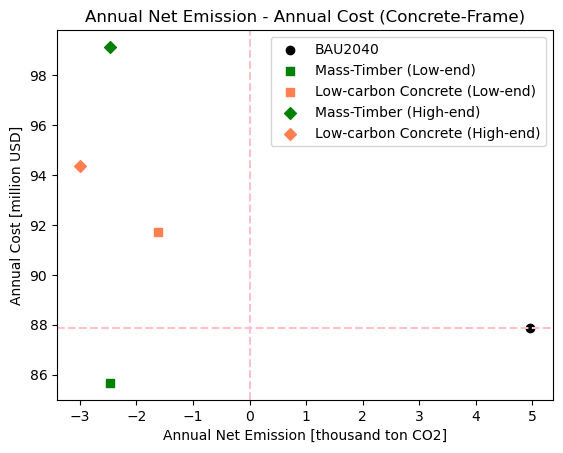

In [186]:
x_data_RC_Only = RC_Only_Emission_Cost_updated.loc['Annual Net Emission']
y_data_RC_Only = RC_Only_Emission_Cost_updated.loc['Annual Cost']

# Creating the scatter plot with different colors and marker styles for each scenario
plt.scatter(x_data_RC_Only['BAU2040'], y_data_RC_Only['BAU2040'], color='black', label='BAU2040')

# Mass-Timber (Low-end) and Alternative Cement (Low-end) scenarios with square marker
plt.scatter(x_data_RC_Only['Mass-Timber (Low-end)'], y_data_RC_Only['Mass-Timber (Low-end)'], color='green', label='Mass-Timber (Low-end)', marker='s')
plt.scatter(x_data_RC_Only['Alternative Cement (Low-end)'], y_data_RC_Only['Alternative Cement (Low-end)'], color='coral', label='Alternative Cement (Low-end)', marker='s')

# Mass-Timber (High-end) and Alternative Cement (High-end) scenarios with diamond marker
plt.scatter(x_data_RC_Only['Mass-Timber (High-end)'], y_data_RC_Only['Mass-Timber (High-end)'], color='green', label='Mass-Timber (High-end)', marker='D')
plt.scatter(x_data_RC_Only['Alternative Cement (High-end)'], y_data_RC_Only['Alternative Cement (High-end)'], color='coral', label='Alternative Cement (High-end)', marker='D')


# Adding labels and title
plt.xlabel('Annual Net Emission [thousand ton CO2]')
plt.ylabel('Annual Cost [million USD]')
plt.title('Annual Net Emission - Annual Cost (Concrete-Frame)')

# Adding a legend
# Get the current handles and labels from the legend
handles, labels = plt.gca().get_legend_handles_labels()

# Find the index of the label you want to change
index_to_change_high = labels.index('Alternative Cement (High-end)')
index_to_change_low = labels.index('Alternative Cement (Low-end)')

# Update the labels at the specified indices
labels[index_to_change_high] = 'Low-carbon Concrete (High-end)'
labels[index_to_change_low] = 'Low-carbon Concrete (Low-end)'

# Re-create the legend with the updated labels
plt.legend(handles, labels)


# Drawing dashed vertical line at x=0
plt.axvline(x=0, color='pink', linestyle='--', label='x=0')
bau2040_y = y_data_RC_Only['BAU2040']
plt.axhline(y=bau2040_y, color='pink', linestyle='--', label='BAU2040')

plt.savefig('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/All-in-One/Output/Figure/Emission_Cost_RC.png')

### City-Wide

In [187]:
# Change the unit of data
City_Wide_Emission_Cost.loc['Annual Net Emission'] = City_Wide_Emission_Cost.loc['Annual Net Emission'] / 1000
City_Wide_Emission_Cost.loc['Annual Cost'] = City_Wide_Emission_Cost.loc['Annual Cost'] / 1e6

City_Wide_Emission_Cost_updated = City_Wide_Emission_Cost.copy()
City_Wide_Emission_Cost_updated

,BAU2040,Mass-Timber (Low-end),Mass-Timber (High-end),Alternative Cement (Low-end),Alternative Cement (High-end)
Annual Net Emission,9.917571,2.483480,2.483480,3.329827,1.949163
Percentage Change from BAU (Emission),0.000000,-74.958783,-74.958783,-66.424974,-80.346363
Annual Cost,254.861517,252.657299,266.100603,258.687244,261.332947
Percentage Change from BAU (Cost),0.000000,-0.864869,4.409880,1.501100,2.539195


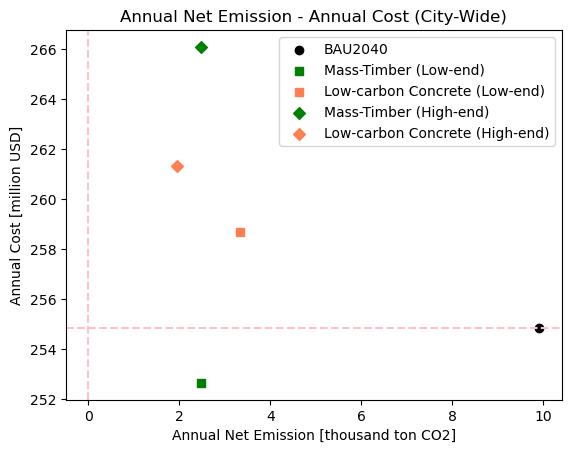

In [188]:
x_data_City_Wide = City_Wide_Emission_Cost_updated.loc['Annual Net Emission']
y_data_City_Wide = City_Wide_Emission_Cost_updated.loc['Annual Cost']

# Creating the scatter plot with different colors and marker styles for each scenario
plt.scatter(x_data_City_Wide['BAU2040'], y_data_City_Wide['BAU2040'], color='black', label='BAU2040')

# Mass-Timber (Low-end) and Alternative Cement (Low-end) scenarios with square marker
plt.scatter(x_data_City_Wide['Mass-Timber (Low-end)'], y_data_City_Wide['Mass-Timber (Low-end)'], color='green', label='Mass-Timber (Low-end)', marker='s')
plt.scatter(x_data_City_Wide['Alternative Cement (Low-end)'], y_data_City_Wide['Alternative Cement (Low-end)'], color='coral', label='Alternative Cement (Low-end)', marker='s')

# Mass-Timber (High-end) and Alternative Cement (High-end) scenarios with diamond marker
plt.scatter(x_data_City_Wide['Mass-Timber (High-end)'], y_data_City_Wide['Mass-Timber (High-end)'], color='green', label='Mass-Timber (High-end)', marker='D')
plt.scatter(x_data_City_Wide['Alternative Cement (High-end)'], y_data_City_Wide['Alternative Cement (High-end)'], color='coral', label='Alternative Cement (High-end)', marker='D')


# Adding labels and title
plt.xlabel('Annual Net Emission [thousand ton CO2]')
plt.ylabel('Annual Cost [million USD]')
plt.title('Annual Net Emission - Annual Cost (City-Wide)')

# Adding a legend
# Get the current handles and labels from the legend
handles, labels = plt.gca().get_legend_handles_labels()

# Find the index of the label you want to change
index_to_change_high = labels.index('Alternative Cement (High-end)')
index_to_change_low = labels.index('Alternative Cement (Low-end)')

# Update the labels at the specified indices
labels[index_to_change_high] = 'Low-carbon Concrete (High-end)'
labels[index_to_change_low] = 'Low-carbon Concrete (Low-end)'

# Re-create the legend with the updated labels
plt.legend(handles, labels)

# Drawing dashed vertical line at x=0
plt.axvline(x=0, color='pink', linestyle='--', label='x=0')
bau2040_y = y_data_City_Wide['BAU2040']
plt.axhline(y=bau2040_y, color='pink', linestyle='--', label='BAU2040')

plt.savefig('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/All-in-One/Output/Figure/Emission_Cost_City_Wide.png')

### For Graphical Abstract

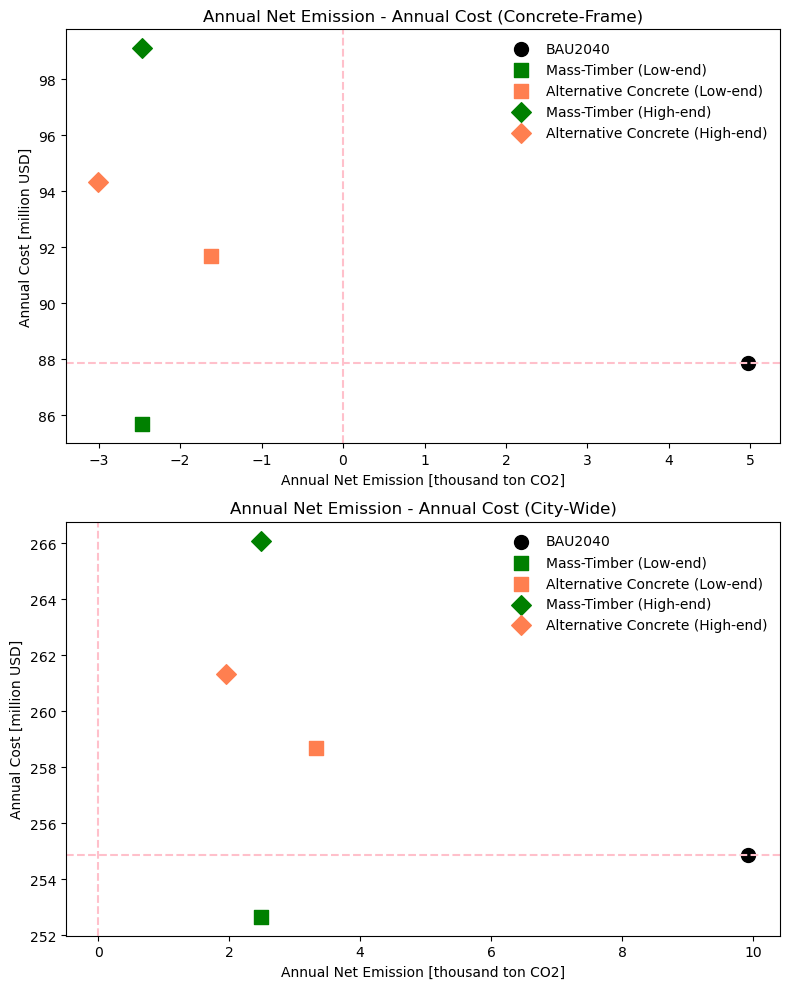

In [189]:
import matplotlib.pyplot as plt

# Data for RC_Only scenario
x_data_RC_Only = RC_Only_Emission_Cost_updated.loc['Annual Net Emission']
y_data_RC_Only = RC_Only_Emission_Cost_updated.loc['Annual Cost']

# Data for City_Wide scenario
x_data_City_Wide = City_Wide_Emission_Cost_updated.loc['Annual Net Emission']
y_data_City_Wide = City_Wide_Emission_Cost_updated.loc['Annual Cost']

# Create the figure with two subplots in one column
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Subplot 1: RC_Only scenario
dot_size = 100  # You can adjust this value based on your preference
ax1 = axes[0]
ax1.scatter(x_data_RC_Only['BAU2040'], y_data_RC_Only['BAU2040'], color='black', label='BAU2040', s=dot_size)
ax1.scatter(x_data_RC_Only['Mass-Timber (Low-end)'], y_data_RC_Only['Mass-Timber (Low-end)'], color='green', label='Mass-Timber (Low-end)', marker='s', s=dot_size)
ax1.scatter(x_data_RC_Only['Alternative Cement (Low-end)'], y_data_RC_Only['Alternative Cement (Low-end)'], color='coral', label='Alternative Concrete (Low-end)', marker='s', s=dot_size)
ax1.scatter(x_data_RC_Only['Mass-Timber (High-end)'], y_data_RC_Only['Mass-Timber (High-end)'], color='green', label='Mass-Timber (High-end)', marker='D', s=dot_size)
ax1.scatter(x_data_RC_Only['Alternative Cement (High-end)'], y_data_RC_Only['Alternative Cement (High-end)'], color='coral', label='Alternative Concrete (High-end)', marker='D', s=dot_size)

ax1.set_facecolor('none')
ax1.legend(framealpha=0)

ax1.set_xlabel('Annual Net Emission [thousand ton CO2]')
ax1.set_ylabel('Annual Cost [million USD]')
ax1.set_title('Annual Net Emission - Annual Cost (Concrete-Frame)')
ax1.axvline(x=0, color='pink', linestyle='--', label='x=0')
bau2040_y = y_data_RC_Only['BAU2040']
ax1.axhline(y=bau2040_y, color='pink', linestyle='--', label='BAU2040')


# Subplot 2: City_Wide scenario
ax2 = axes[1]
ax2.scatter(x_data_City_Wide['BAU2040'], y_data_City_Wide['BAU2040'], color='black', label='BAU2040', s=dot_size)
ax2.scatter(x_data_City_Wide['Mass-Timber (Low-end)'], y_data_City_Wide['Mass-Timber (Low-end)'], color='green', label='Mass-Timber (Low-end)', marker='s', s=dot_size)
ax2.scatter(x_data_City_Wide['Alternative Cement (Low-end)'], y_data_City_Wide['Alternative Cement (Low-end)'], color='coral', label='Alternative Concrete (Low-end)', marker='s', s=dot_size)
ax2.scatter(x_data_City_Wide['Mass-Timber (High-end)'], y_data_City_Wide['Mass-Timber (High-end)'], color='green', label='Mass-Timber (High-end)', marker='D', s=dot_size)
ax2.scatter(x_data_City_Wide['Alternative Cement (High-end)'], y_data_City_Wide['Alternative Cement (High-end)'], color='coral', label='Alternative Concrete (High-end)', marker='D', s=dot_size)

ax2.set_facecolor('none')
ax2.legend(framealpha=0)

ax2.set_xlabel('Annual Net Emission [thousand ton CO2]')
ax2.set_ylabel('Annual Cost [million USD]')
ax2.set_title('Annual Net Emission - Annual Cost (City-Wide)')
ax2.axvline(x=0, color='pink', linestyle='--', label='x=0')
bau2040_y = y_data_City_Wide['BAU2040']
ax2.axhline(y=bau2040_y, color='pink', linestyle='--', label='BAU2040')


# Adjust the layout to avoid overlapping titles and labels
plt.tight_layout()

# Save the plot without background color and legend background transparency
plt.savefig('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/All-in-One/Output/Figure/Figure_for_Graphical_Abstract.png', transparent=True)


